In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

### Newton's method
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
Example 1: find root for 
$$f(x) = x^2 - sin(x)$$
$$f'(x) = 2x - cos(x)$$

In [4]:
sess = tf.Session(config=config)

In [5]:
X = np.linspace(-2, 2, 100)

In [6]:
x = tf.placeholder(tf.float32, name="x")
y = x**2 - tf.sin(x)

#### Calculating derevative

In [7]:
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [8]:
grad_by_hand = 2*x - tf.cos(x)

#### Plot

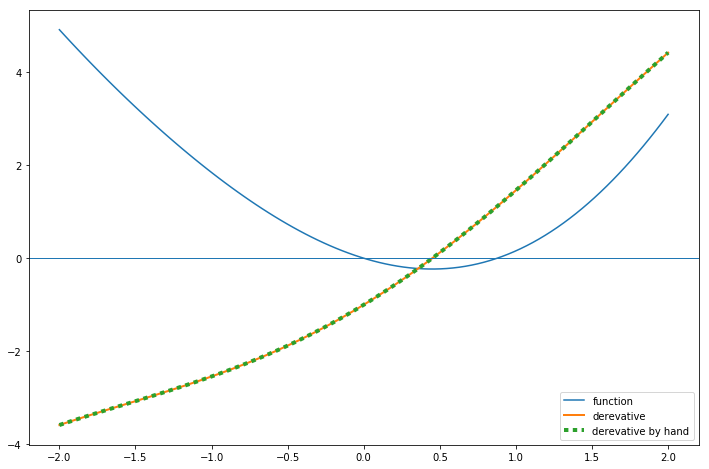

In [9]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [10]:
iterations = 10
xs1 = [-2]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [2]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)


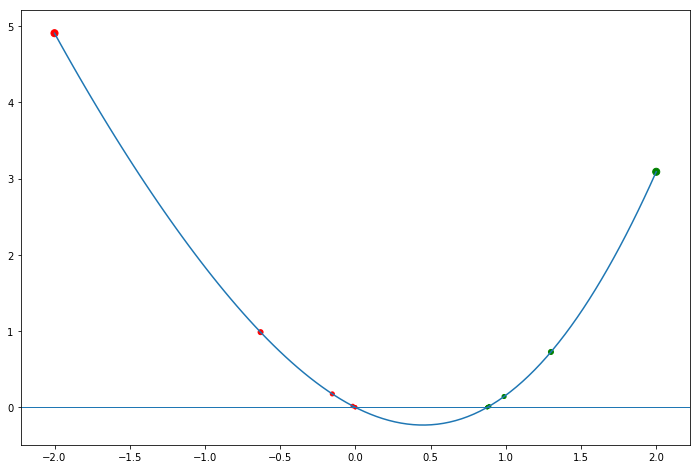

In [11]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")


plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)

In [12]:
print("root 1:", xs1[-1],"\nroot 2:", xs2[-1])

root 1: 0.0 
root 2: 0.87672619035407
